In [ ]:
Oil Price forcasting
Data driven Model

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Read Dataset

In [3]:
data = pd.read_excel("RBRTE Data.xlsx")

In [4]:
data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


# Data Pre-processing

In [ ]:
Observing above,  dataset is missing saturday and sunday value at index 2 & 3 also at index 7& 8.

In [5]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [6]:
data.shape

(8911, 2)

In [7]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [8]:
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [9]:
data1=data.copy()

In [10]:
data1

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [11]:
data1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [12]:
data1.set_index('Date', inplace=True)

In [13]:
data1.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [14]:
#Resample values of saturday and sunday with prvious day price
data2 = data1.resample('D').ffill().reset_index()

In [ ]:
# resampling is done daywise. Here upsampling means adding missing day values is done.

In [15]:
data2.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63
7,1987-05-27,18.60
8,1987-05-28,18.60
9,1987-05-29,18.58


In [16]:
data2.isnull().sum()

Date     0
Price    0
dtype: int64

In [17]:
data2.describe()

,Price
count,12823.000000
mean,47.971713
std,32.716123
min,9.100000
25%,19.000000
50%,37.150000
75%,69.360000
max,143.950000


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12823 non-null  datetime64[ns]
 1   Price   12823 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 200.5 KB


In [19]:
#Due to resampling values for saturday and sunday is added in the data2 dataset. Originally it was 8911 rows × 2 columns for data1

data2.shape

(12823, 2)

# EDA

In [14]:
data2_backup=data2.copy()
data2_backup.head(10)
#data2_backup.shape

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63
7,1987-05-27,18.60
8,1987-05-28,18.60
9,1987-05-29,18.58


In [17]:
data2_backup.shape

(12823, 2)

In [18]:
data2['Year']=data2['Date'].dt.year
data2['Month']=data2['Date'].dt.month
data2['Week']=data2['Date'].dt.week

C:\Users\admin\AppData\Local\Temp/ipykernel_8348/587004992.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data2['Week']=data2['Date'].dt.week


In [19]:
data2.head(30)

,Date,Price,Year,Month,Week
0,1987-05-20,18.63,1987,5,21
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,21
3,1987-05-23,18.55,1987,5,21
4,1987-05-24,18.55,1987,5,21
5,1987-05-25,18.60,1987,5,22
6,1987-05-26,18.63,1987,5,22
7,1987-05-27,18.60,1987,5,22
8,1987-05-28,18.60,1987,5,22
9,1987-05-29,18.58,1987,5,22


In [20]:
data2.tail(30)

,Date,Price,Year,Month,Week
12793,2022-05-29,121.19,2022,5,21
12794,2022-05-30,123.01,2022,5,22
12795,2022-05-31,125.53,2022,5,22
12796,2022-06-01,122.20,2022,6,22
12797,2022-06-02,122.20,2022,6,22
12798,2022-06-03,125.68,2022,6,22
12799,2022-06-04,125.68,2022,6,22
12800,2022-06-05,125.68,2022,6,22
12801,2022-06-06,124.99,2022,6,23
12802,2022-06-07,126.89,2022,6,23


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12823 non-null  datetime64[ns]
 1   Price   12823 non-null  float64       
 2   Year    12823 non-null  int64         
 3   Month   12823 non-null  int64         
 4   Week    12823 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 501.0 KB


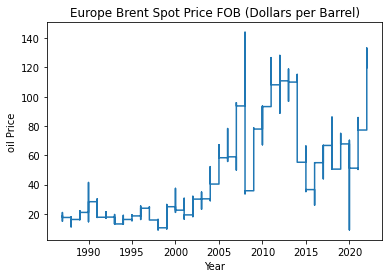

In [25]:
plt.plot(data2.Year, data2.Price)
plt.xlabel("Year")  # add X-axis label
plt.ylabel("oil Price")  # add Y-axis label
plt.title("Europe Brent Spot Price FOB (Dollars per Barrel)")  # add title
plt.show()

<AxesSubplot:title={'center':'Europe Brent Spot Price FOB (Dollars per Barrel)'}, xlabel='Year', ylabel='Price'>

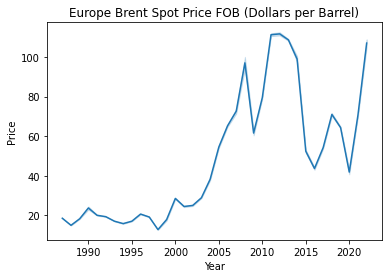

In [30]:
import seaborn as sns
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Europe Brent Spot Price FOB (Dollars per Barrel)")  # add title
sns.lineplot(x='Year',y='Price',data = data2)

<AxesSubplot:ylabel='Crude Oil Prices: Brent - Europe'>

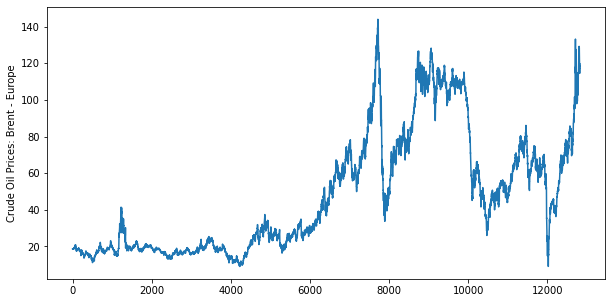

In [26]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data2.Price.plot(figsize=(10,5))

In [ ]:
Inference: All above plot shows that time series data doesnt follow any trend or linearity but lots of spikes are present.It means datais not stationary.

In [ ]:
Now we will perform check for outliers

In [27]:
data2.Year.unique()

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

In [ ]:
#Histogram shows data is positively skwed.Not normally distributed.

Text(0.5, 1.0, 'Europe Brent Spot Price FOB (Dollars per Barrel)')

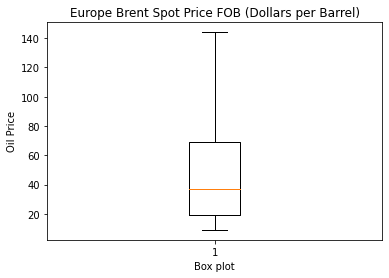

In [28]:
#Boxplot
#help(plt.boxplot)
plt.boxplot(data2['Price'],vert = True)
plt.ylabel('Oil Price')
plt.xlabel('Box plot')
plt.title('Europe Brent Spot Price FOB (Dollars per Barrel)')
#No Outlier found

<AxesSubplot:xlabel='Price'>

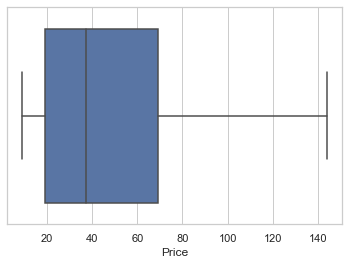

In [31]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=data2["Price"])

In [ ]:
# No Outlier found.Data is positively skwed

<AxesSubplot:xlabel='Year'>

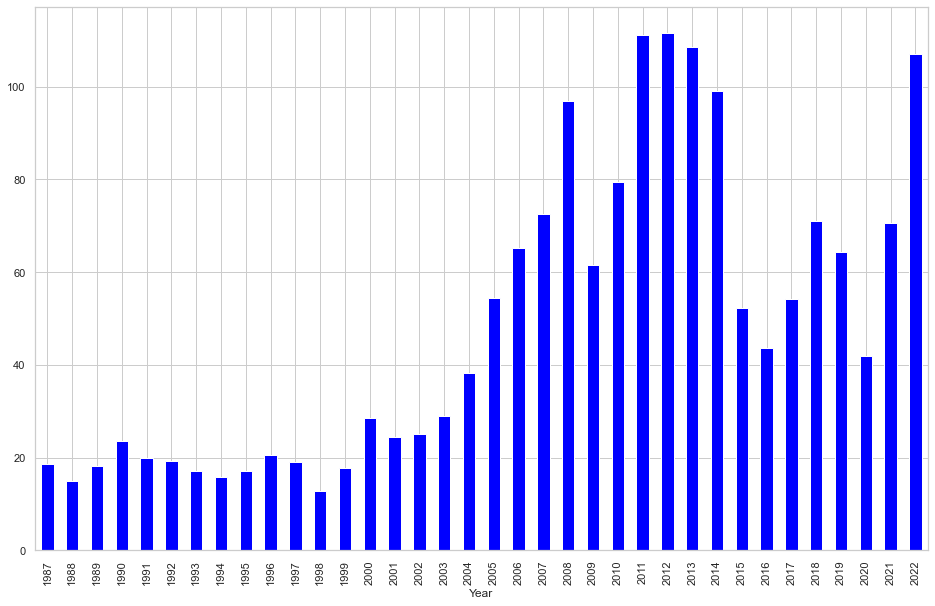

In [32]:
plt.figure(figsize=(16, 10))
data2.groupby('Year')['Price'].mean().plot(kind='bar',color='Blue')

In [ ]:
Bar graph shows initially oil price were low from 1987 till 2004.
It also shows, Oil prices was high from 2011 to 2013. After that dropping till 2021. From 2015 onwards, the prices seem to fluctuate with some peaks and falls but is showing a growing trend from 2020 upto present.

In [33]:
corrs=data2.corr()
corrs

,Price,Year,Month,Week
Price,1.000000,0.711887,-0.009839,-0.012098
Year,0.711887,1.000000,-0.041254,-0.041036
Month,-0.009839,-0.041254,1.000000,0.970501
Week,-0.012098,-0.041036,0.970501,1.000000


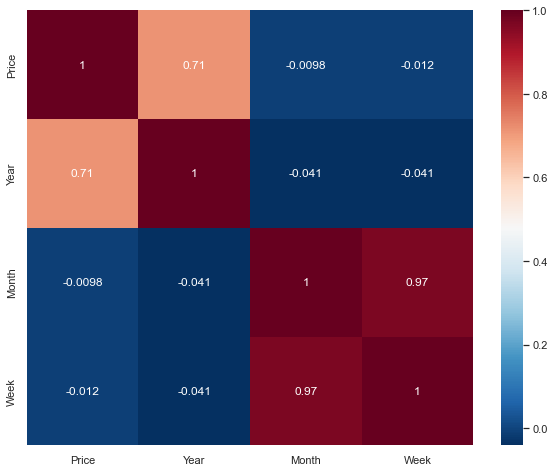

In [35]:
#heatmap of correlation
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

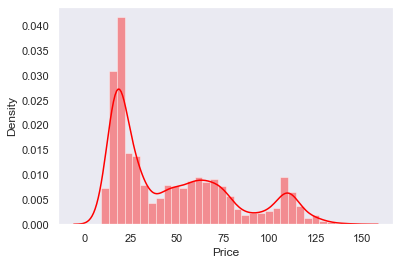

In [34]:
#Distribution Plot
sns.set(style='dark',)
sns.distplot(data2["Price"],color='red')

array([<AxesSubplot:>], dtype=object)

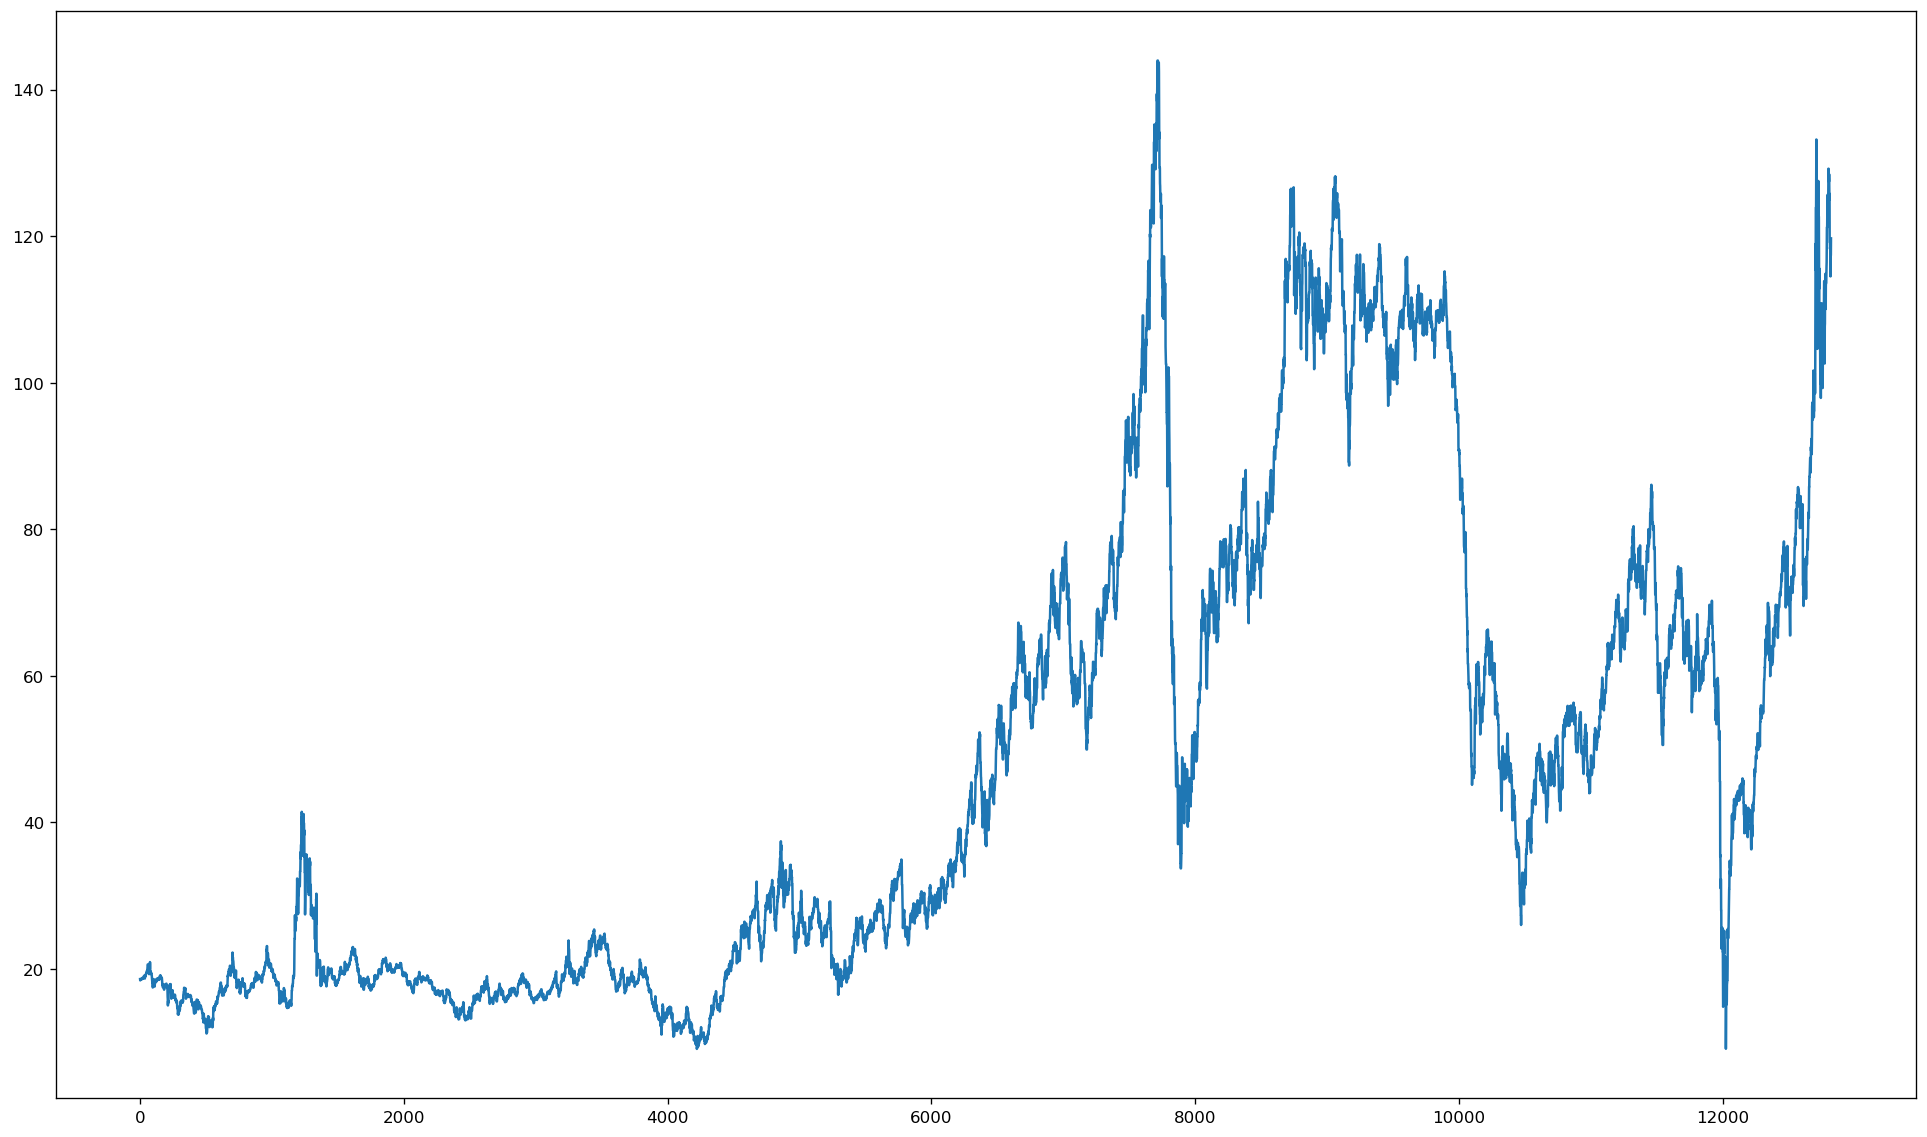

In [154]:
data2.Price.plot(subplots=True, figsize=(20,12))

In [ ]:
#This time series is not stationary and will require differencing to make it stationary.
#For this we will perform following operations like rolling stastics,Dickey-Fuller test,moving average

In [45]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 Price
Date                  
1987-05-20         NaN
1987-05-21         NaN
1987-05-22         NaN
1987-05-23         NaN
1987-05-24         NaN
...                ...
2022-06-23  121.508333
2022-06-24  120.668333
2022-06-25  119.745000
2022-06-26  118.940000
2022-06-27  118.500833

[12823 rows x 1 columns]                Price
Date                
1987-05-20       NaN
1987-05-21       NaN
1987-05-22       NaN
1987-05-23       NaN
1987-05-24       NaN
...              ...
2022-06-23  4.897366
2022-06-24  4.645457
2022-06-25  4.019257
2022-06-26  3.339638
2022-06-27  2.774768

[12823 rows x 1 columns]


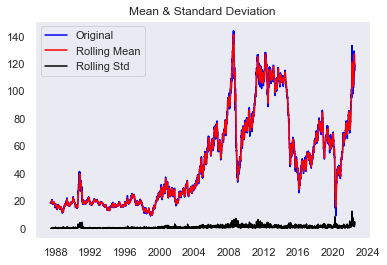

In [46]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Mean & Standard Deviation')
plt.show(block=False)

# Checking the Stationarity of the Series using ADFuller test and KPSS Test

In [ ]:
#### Augmented Dickey-Fuller Test (ADFuller Test)
1. ADF test is conducted with the following assumptions :

1. Null Hypothesis (HO): Series is non-stationary.
2. Alternate Hypothesis(HA): Series is stationary.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO):
If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [21]:
#Augmented Dickey-Fuller Test (ADFuller Test)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=365).mean()
    rolstd = pd.Series(timeseries).rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
    #plt.figure(figsize=(20,15))
#test_stationarity(data2["Price"])

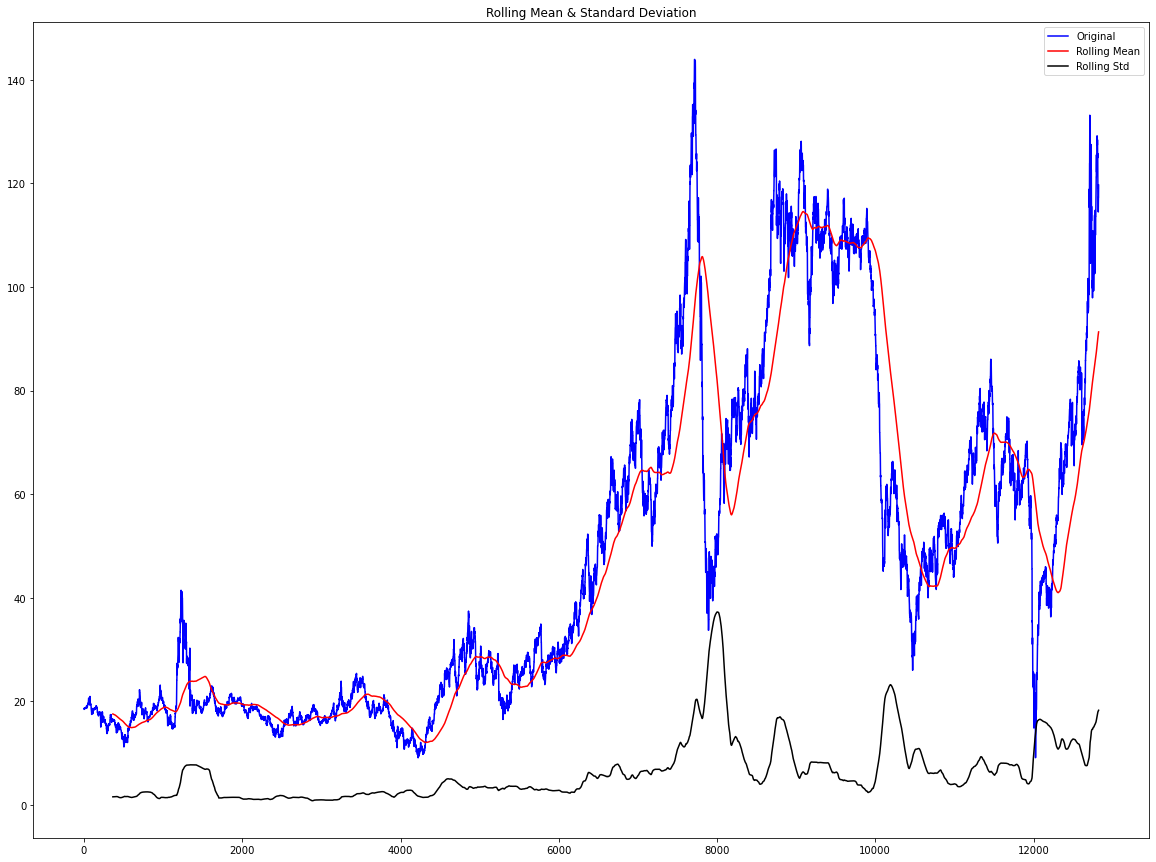

Results of Dickey-Fuller Test:
Test Statistic                    -1.565654
p-value                            0.500820
#Lags Used                        41.000000
Number of Observations Used    12781.000000
Critical Value (1%)               -3.430862
Critical Value (5%)               -2.861766
Critical Value (10%)              -2.566890
dtype: float64


In [22]:
plt.figure(figsize=(20,15))
test_stationarity(data2["Price"])

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).
The p-value obtained is greater than significance level of 0.05 and the ADF test statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [ ]:
2 . KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [23]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(data2['Price'])

Results of KPSS Test:
Test Statistic           18.472769
p-value                   0.010000
Lags Used                41.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, it fail to reject the null hypothesis (series is stationary). 

In [ ]:
Conclusion: In this case test stastics is less than critical value hence it fails to reject null Hypothesis hence it indicatesseries is stationary in tred manner or seires is trend stationary

In [ ]:
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
Seasonal Decompose

In [ ]:
Seasonal Decompose to check trend,seasonality,level and noise.

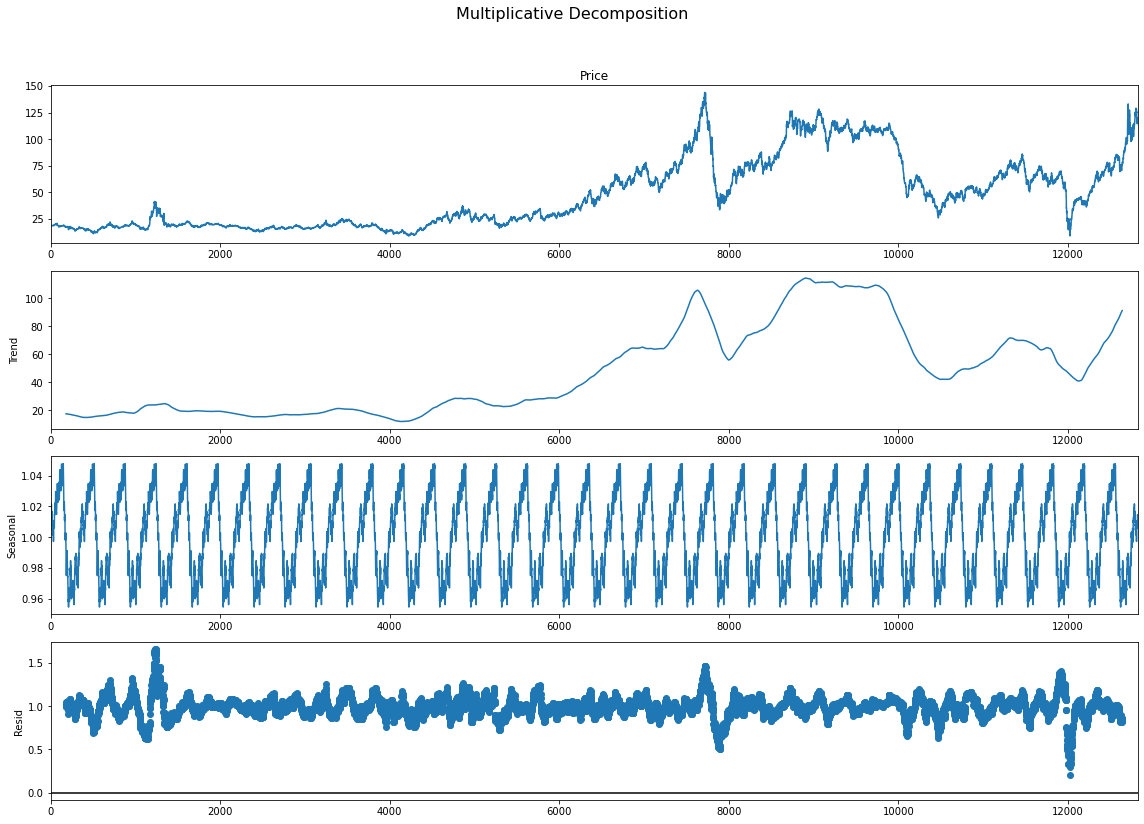

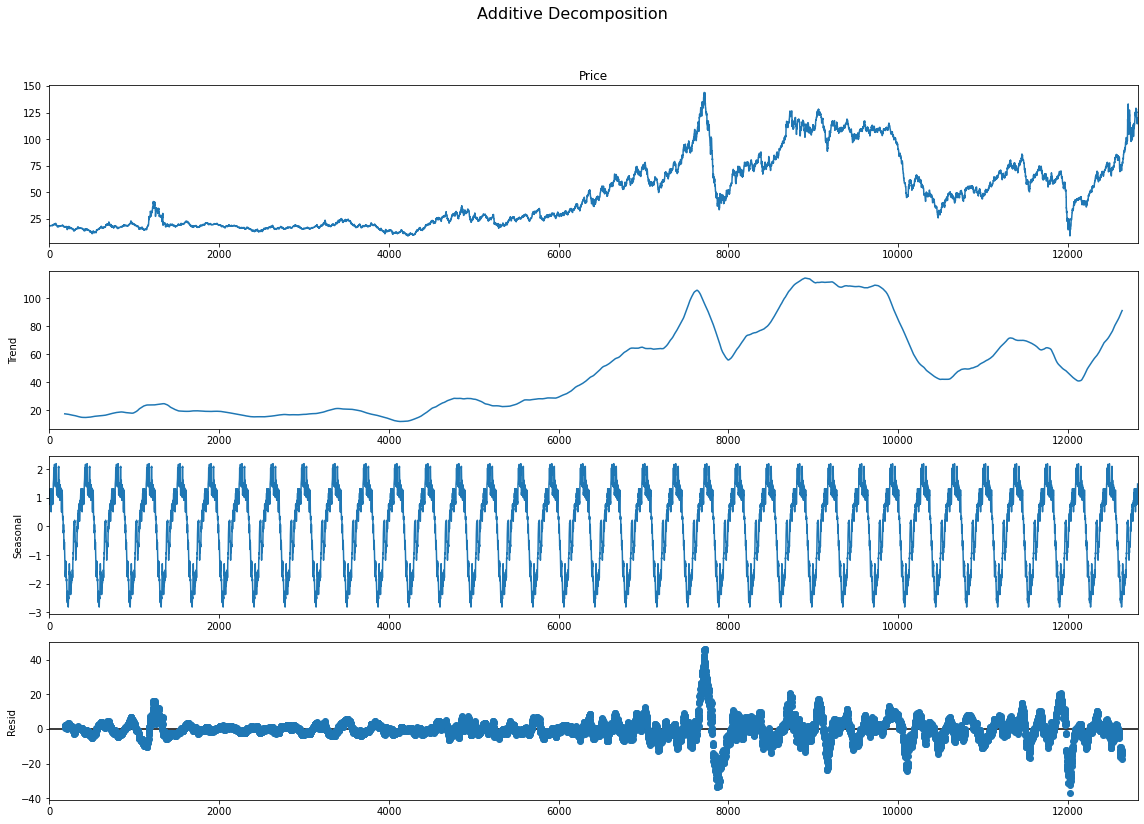

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data2["Price"], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data2["Price"], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Making a Time Series Stationary

In [ ]:
1. Differencing
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt = yt – y(t-1)

where yt is the value at a time t

<AxesSubplot:>

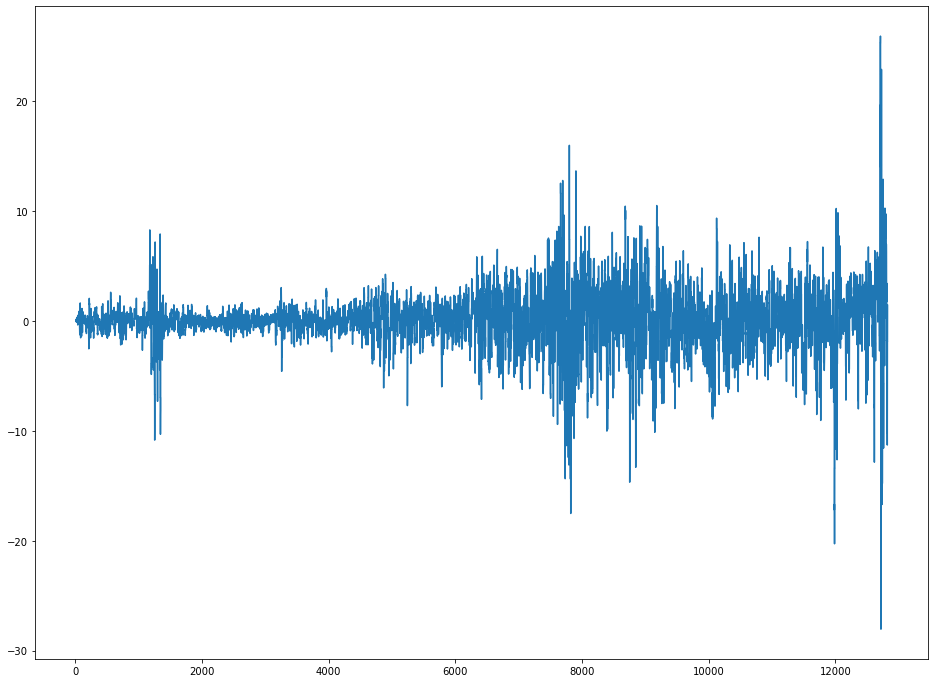

In [28]:
data2['Price_diff'] = data2['Price'] - data2['Price'].shift(7)
data2['Price_diff'].dropna().plot()

In [ ]:
2.Seasonal Differencing
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt = yt – y(t-n)

<AxesSubplot:>

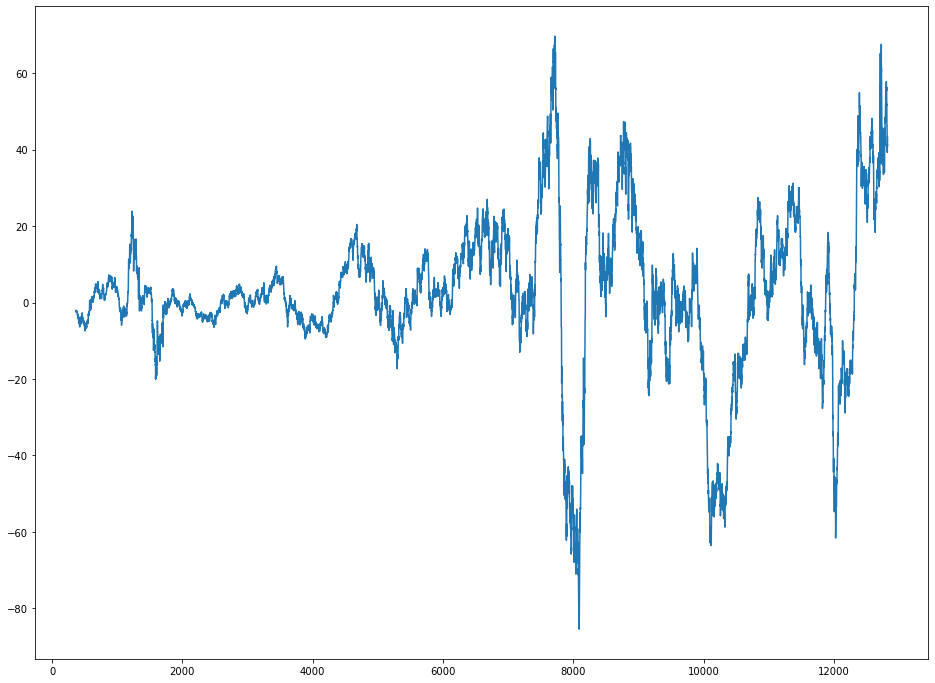

In [29]:
n=365
data2['Price_diff1'] = data2['Price'] - data2['Price'].shift(n)
data2['Price_diff1'].dropna().plot()

In [ ]:
3.Transformation
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

<AxesSubplot:>

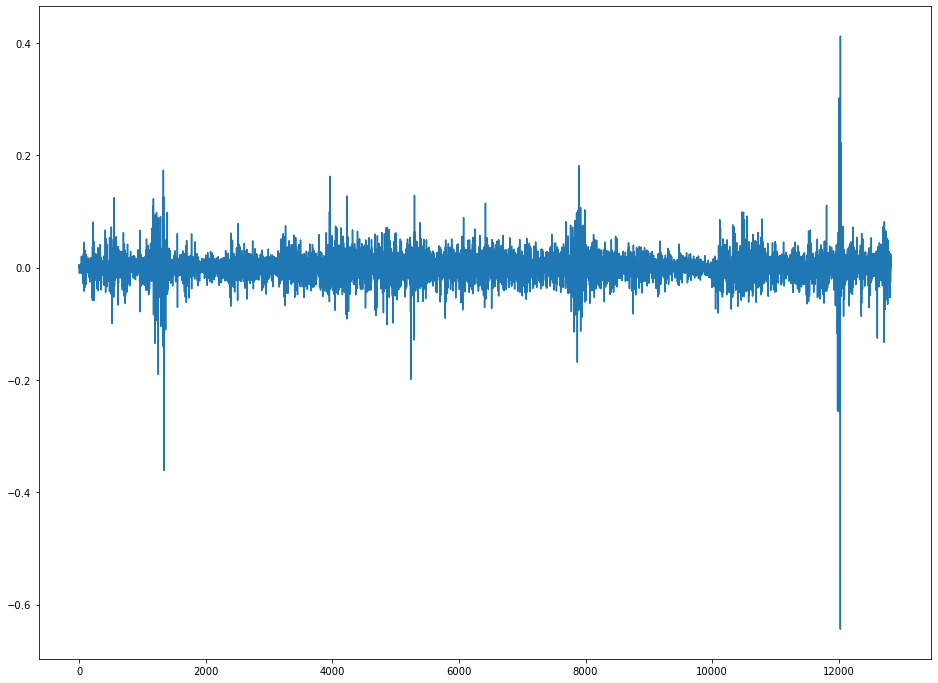

In [53]:
data2['Price_log'] = np.log(data2['Price'])
data2['Price_log_diff'] = data2['Price_log'] - data2['Price_log'].shift(1)
data2['Price_log_diff'].dropna().plot()

<AxesSubplot:>

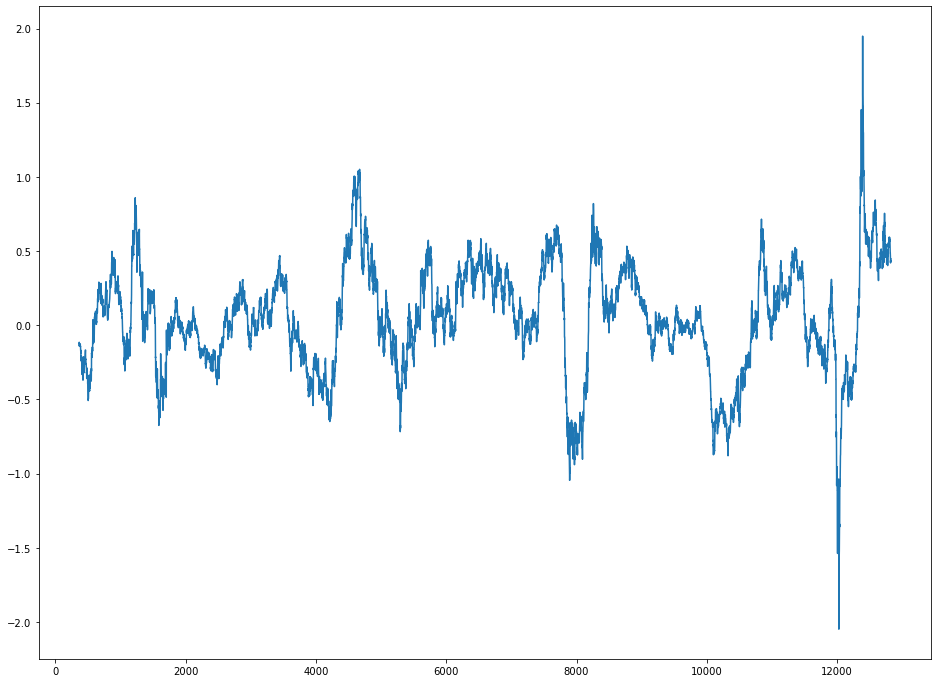

In [34]:
#data2['Price_log'] = np.log(data2['Price'])
data2['Price_log_diff1'] = data2['Price_log'] - data2['Price_log'].shift(365)
data2['Price_log_diff1'].dropna().plot()

In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12823 non-null  datetime64[ns]
 1   Price            12823 non-null  float64       
 2   Year             12823 non-null  int64         
 3   Month            12823 non-null  int64         
 4   Week             12823 non-null  int64         
 5   Price_diff       12816 non-null  float64       
 6   Price_diff1      12458 non-null  float64       
 7   Price_log        12823 non-null  float64       
 8   Price_log_diff   12816 non-null  float64       
 9   Price_log_diff1  12458 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 1001.9 KB


In [64]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12823 non-null  datetime64[ns]
 1   Price            12823 non-null  float64       
 2   Year             12823 non-null  int64         
 3   Month            12823 non-null  int64         
 4   Week             12823 non-null  int64         
 5   Price_diff       12822 non-null  float64       
 6   Price_diff1      12458 non-null  float64       
 7   Price_log        12823 non-null  float64       
 8   Price_log_diff   12822 non-null  float64       
 9   Price_log_diff1  12458 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 1001.9 KB


In [54]:
data2['Price_diff'] = data2['Price_diff'].fillna(data2['Price_diff'].mean())
data2['Price_diff1'] = data2['Price_diff1'].fillna(data2['Price_diff1'].mean())
data2['Price_log_diff'] = data2['Price_log_diff'].fillna(data2['Price_log_diff'].mean())
data2['Price_log_diff1'] = data2['Price_log_diff1'].fillna(data2['Price_log_diff1'].mean())

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12823 non-null  datetime64[ns]
 1   Price            12823 non-null  float64       
 2   Year             12823 non-null  int64         
 3   Month            12823 non-null  int64         
 4   Week             12823 non-null  int64         
 5   Price_diff       12823 non-null  float64       
 6   Price_diff1      12823 non-null  float64       
 7   Price_log        12823 non-null  float64       
 8   Price_log_diff   12823 non-null  float64       
 9   Price_log_diff1  12823 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 1001.9 KB


# Now check stationarity after transformation

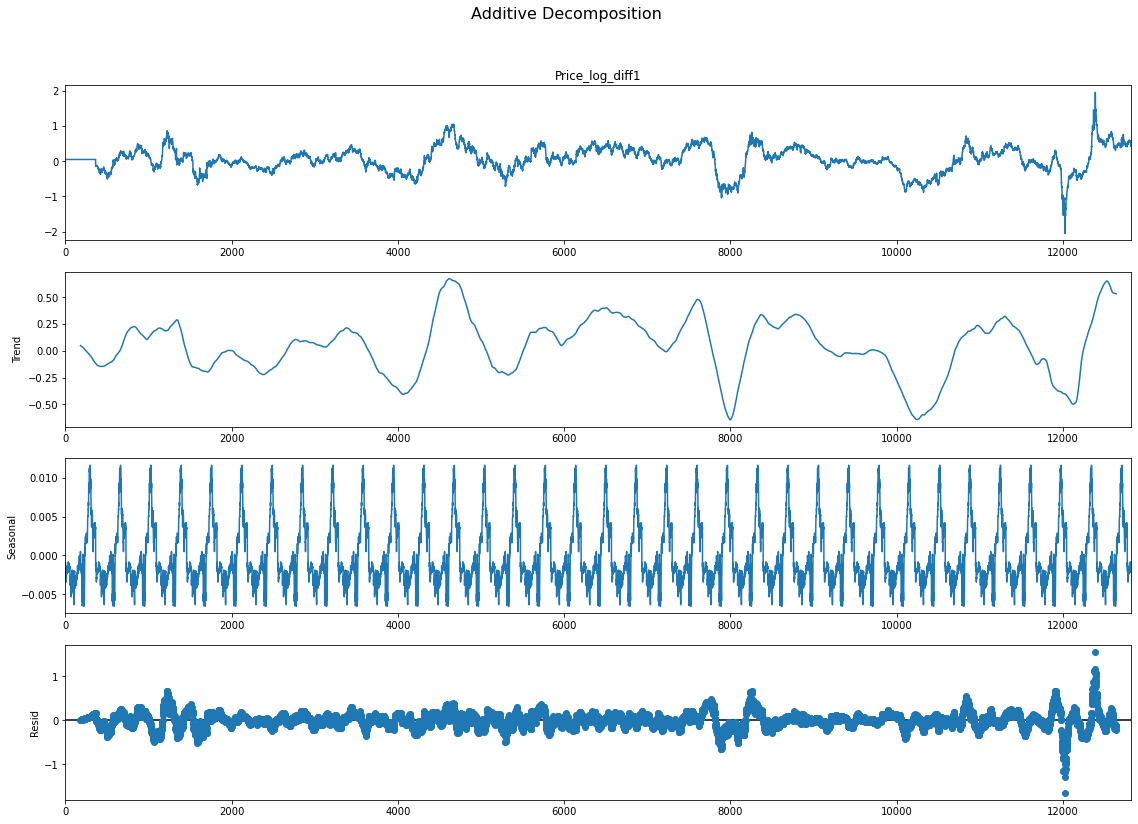

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Additive Decomposition
additive_decomposition = seasonal_decompose(data2["Price_log_diff1"], model='additive', period=365)

# Plot
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [39]:
#Augmented Dickey-Fuller Test (ADFuller Test)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=365).mean()
    rolstd = pd.Series(timeseries).rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    

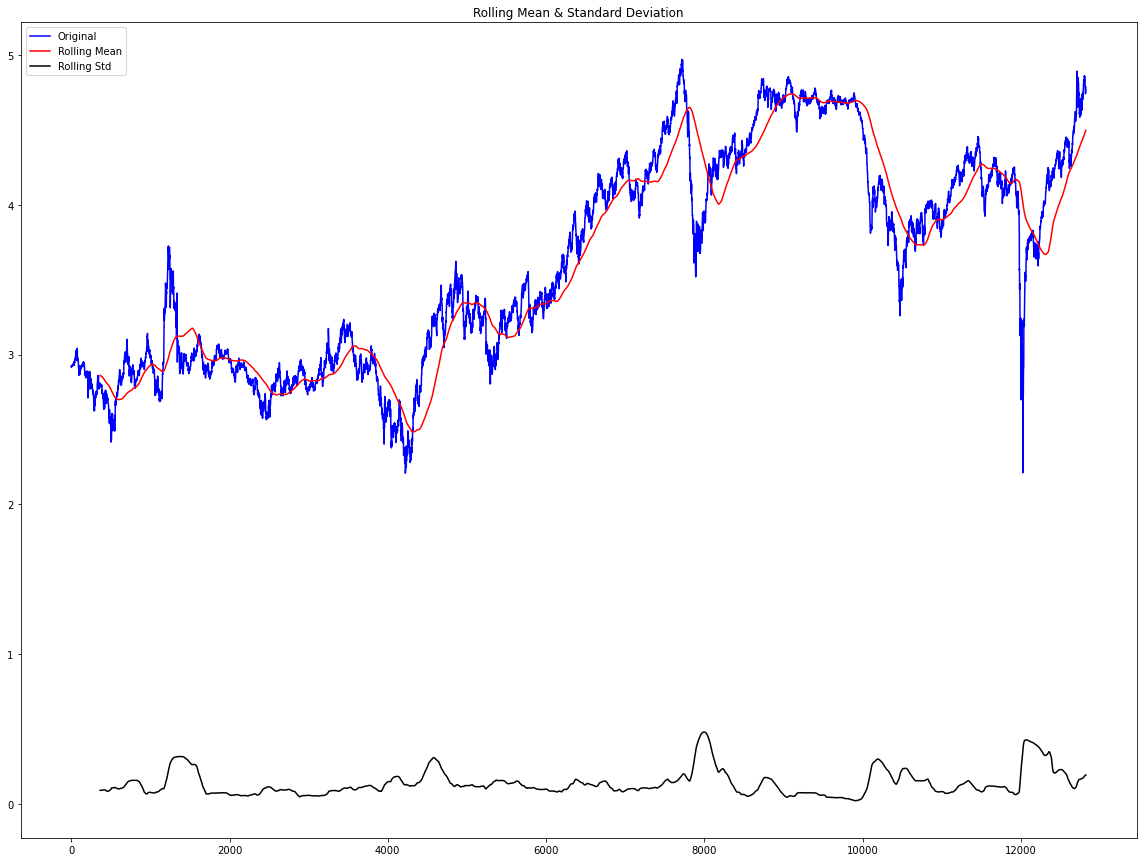

Results of Dickey-Fuller Test:
Test Statistic                    -1.683236
p-value                            0.439770
#Lags Used                        36.000000
Number of Observations Used    12786.000000
Critical Value (1%)               -3.430862
Critical Value (5%)               -2.861766
Critical Value (10%)              -2.566890
dtype: float64


In [40]:
plt.figure(figsize=(20,15))
test_stationarity(data2["Price_log"])

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary

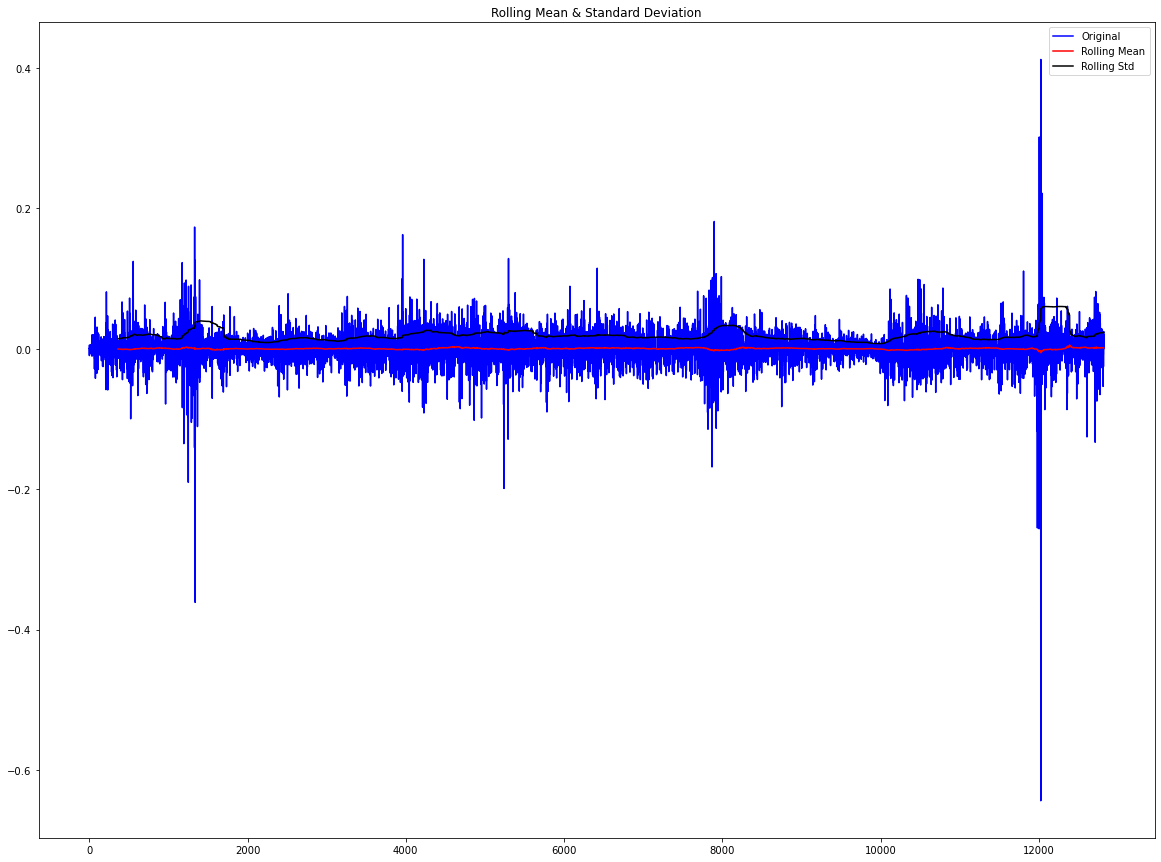

Results of Dickey-Fuller Test:
Test Statistic                -1.726682e+01
p-value                        5.894420e-30
#Lags Used                     3.500000e+01
Number of Observations Used    1.278700e+04
Critical Value (1%)           -3.430862e+00
Critical Value (5%)           -2.861766e+00
Critical Value (10%)          -2.566890e+00
dtype: float64


In [56]:
plt.figure(figsize=(20,15))
test_stationarity(data2["Price_log_diff"])

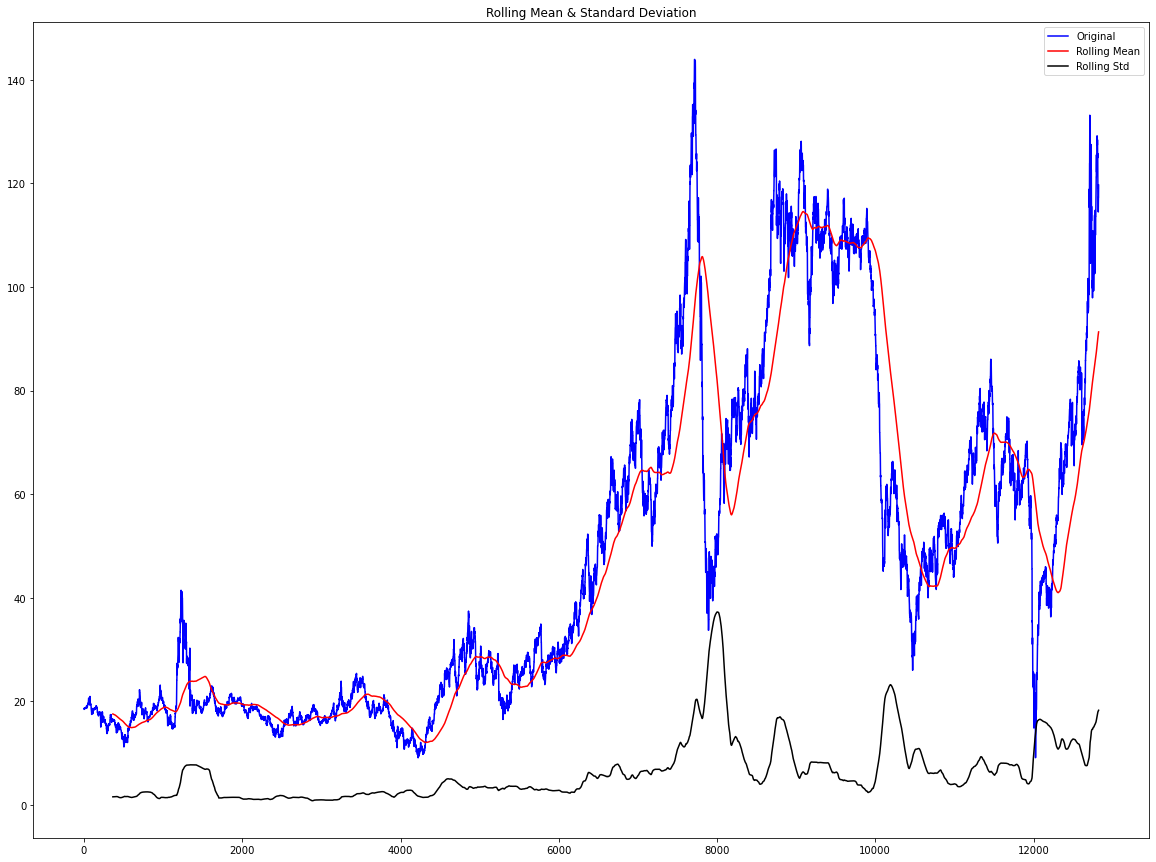

Results of Dickey-Fuller Test:
Test Statistic                    -1.565654
p-value                            0.500820
#Lags Used                        41.000000
Number of Observations Used    12781.000000
Critical Value (1%)               -3.430862
Critical Value (5%)               -2.861766
Critical Value (10%)              -2.566890
dtype: float64


In [42]:
plt.figure(figsize=(20,15))
test_stationarity(data2["Price"])

Inference: Here we can see that with price_log_diff we get p value less than any critical value.Hence Price_log_diff function gives stability .Hence our data is now stationary

# Forecasting Time series data 


In [ ]:
5. Forecasting a Time Series
 ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. 

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [43]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [57]:
lag_acf = acf(data2.Price_log_diff.dropna().values, nlags=100)
lag_pacf = pacf(data2.Price_log_diff.dropna().values, nlags=100, method='ols')
#acf_lag = acf(train_df.diff().dropna().values, nlags=20)
#pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

#plt.figure(figsize=(22,10))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

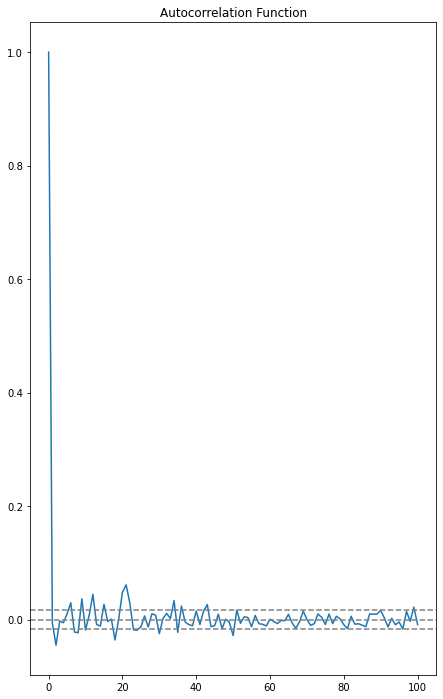

In [58]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data2.Price_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data2.Price_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

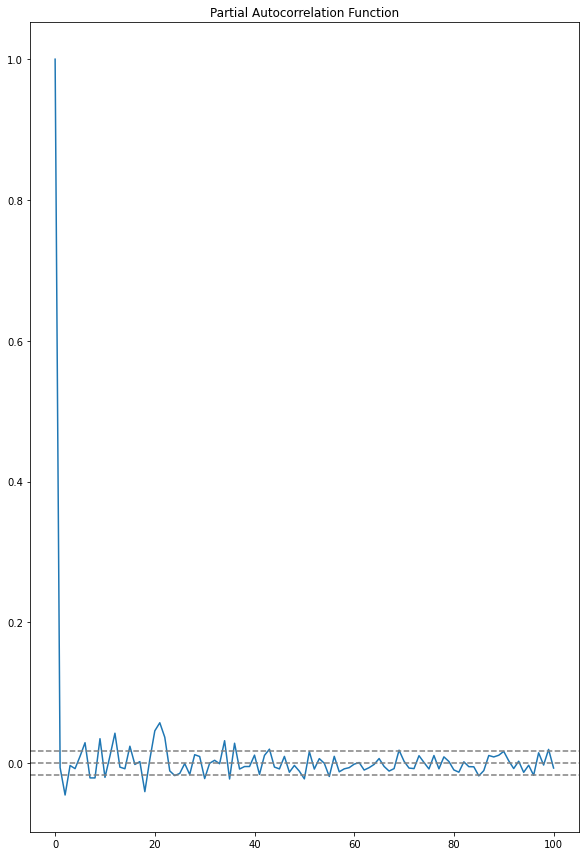

In [59]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data2.Price_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data2.Price_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Inference: We can see that in above ACF and PACF graph the lag value is within lag of 1.Hence in this situation ARIMA(1,1,1) work perfectly.

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
1. AR Model (0,2,2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'RSS: nan')

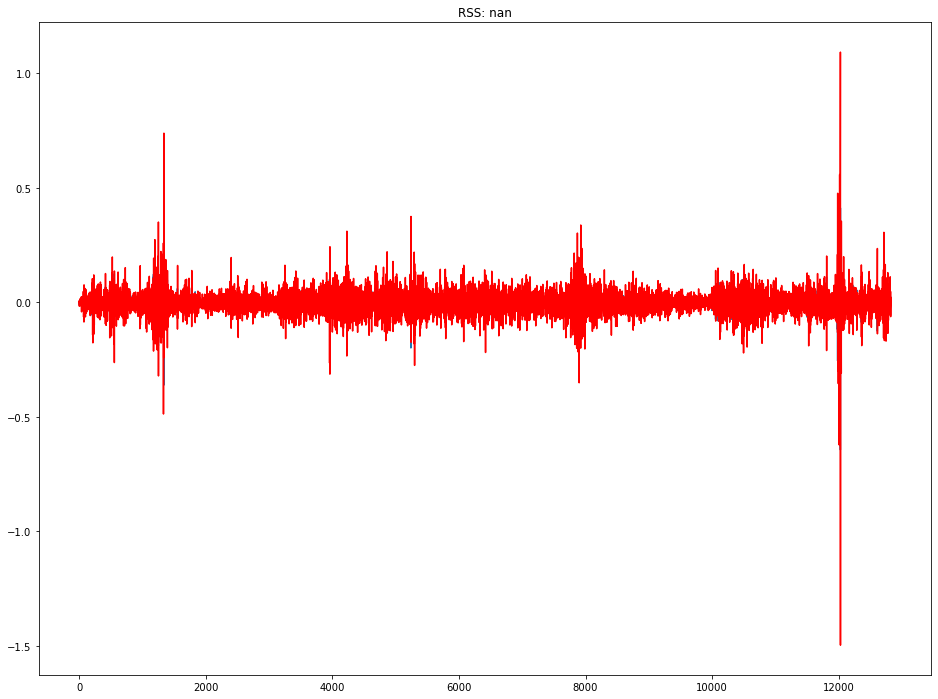

In [62]:
model = ARIMA(data2.Price_log_diff, order=(0,2,2))  
results_AR = model.fit()  
plt.plot(data2.Price_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data2.Price_log_diff)**2))

In [63]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data2.Price_log_diff, order=(0,2,2))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Price_log_diff   No. Observations:                12823
Model:                 ARIMA(0, 2, 2)   Log Likelihood               31103.933
Date:                Sun, 10 Jul 2022   AIC                         -62201.866
Time:                        11:48:22   BIC                         -62179.490
Sample:                             0   HQIC                        -62194.384
                              - 12823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9997      0.004   -514.157      0.000      -2.007      -1.992
ma.L2          0.9997      0.004    257.051      0.000       0.992       1.007
sigma2         0.0005   1.92e-06    254.235      0.0

In [ ]:
2.Model 2: ARIMA(2,2,0)

Text(0.5, 1.0, 'RSS: 14.8917')

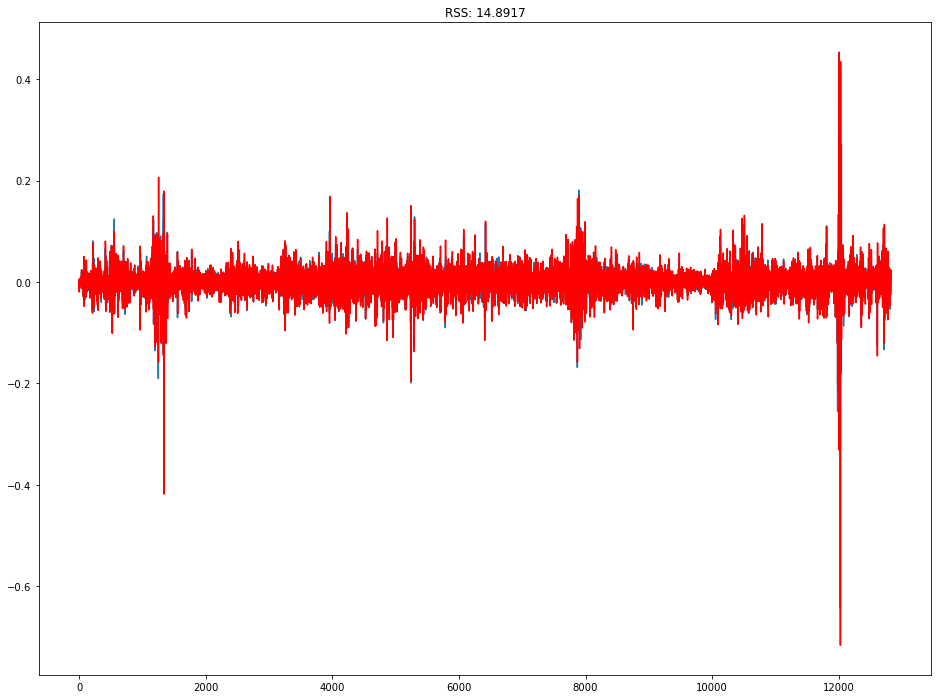

In [64]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(data2.Price_log_diff, order=(2, 2, 0))  
results_AR = model.fit()  
plt.plot(data2.Price_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data2.Price_log_diff)**2))

In [65]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data2.Price_log_diff, order=(2,2,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         Price_log_diff   No. Observations:                12823
Model:                 ARIMA(2, 2, 0)   Log Likelihood               25129.813
Date:                Sun, 10 Jul 2022   AIC                         -50253.626
Time:                        11:52:13   BIC                         -50231.250
Sample:                             0   HQIC                        -50246.145
                              - 12823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9772      0.002   -465.188      0.000      -0.981      -0.973
ar.L2         -0.5065      0.002   -305.583      0.000      -0.510      -0.503
sigma2         0.0012   2.37e-06    489.066      0.0

In [ ]:
Model 3: Auto ARIMA
Model 3: ARIMA(1,1,1)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 5.8070')

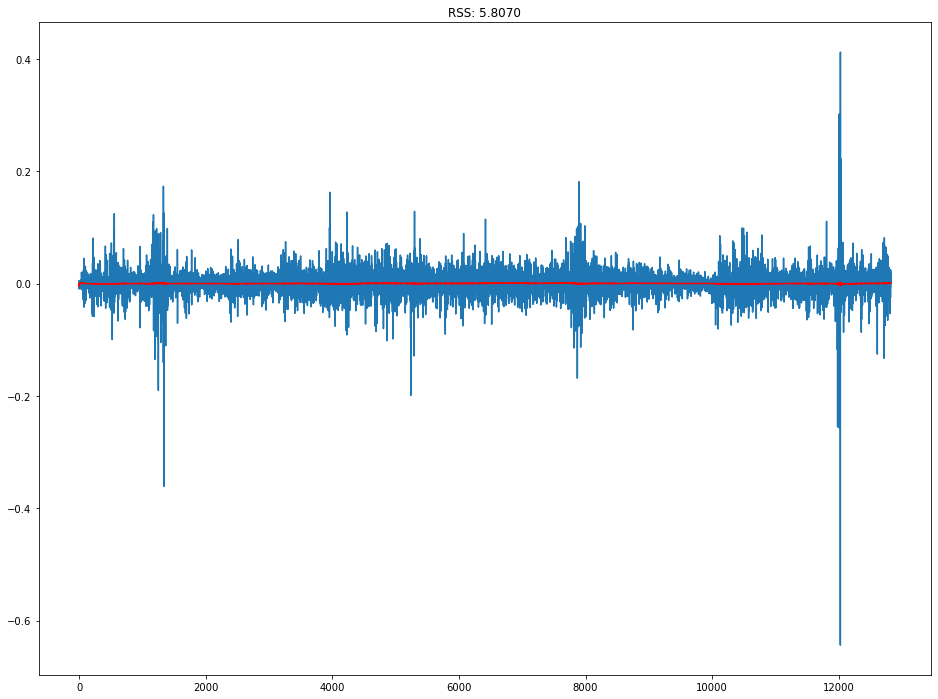

In [66]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(data2.Price_log_diff, order=(1, 1, 1))  
results_AR = model.fit()  
plt.plot(data2.Price_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data2.Price_log_diff)**2))

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data2.Price_log_diff, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         Price_log_diff   No. Observations:                12823
Model:                 ARIMA(1, 1, 1)   Log Likelihood               31167.748
Date:                Sun, 10 Jul 2022   AIC                         -62329.496
Time:                        11:55:08   BIC                         -62307.119
Sample:                             0   HQIC                        -62322.014
                              - 12823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0066      0.002     -3.677      0.000      -0.010      -0.003
ma.L1         -1.0000      0.009   -112.840      0.000      -1.017      -0.983
sigma2         0.0005   3.76e-06    120.510      0.0

In [ ]:
From the diagnostic checking, all the 3 models are adequate. AIC criterion allowed us to compare the fit of different models if the models are adequate. The smaller the AIC criterion, the better the model. Therefore, a final fitted model chosen is ARIMA(1,1,1) which give the lowest AIC (-62329.496) among all models from the table above.

In [ ]:
Model 1 AR Model (0,2,2): AIC :-62201.866
Model 2 ARIMA(2,2,0): AIC :-50253.626
Model 3 ARIMA(1,1,1): AIC :-62329.496

# Final fitted model ARIMA(1,1,1) with fitted values and forecast for 10 steps ahead

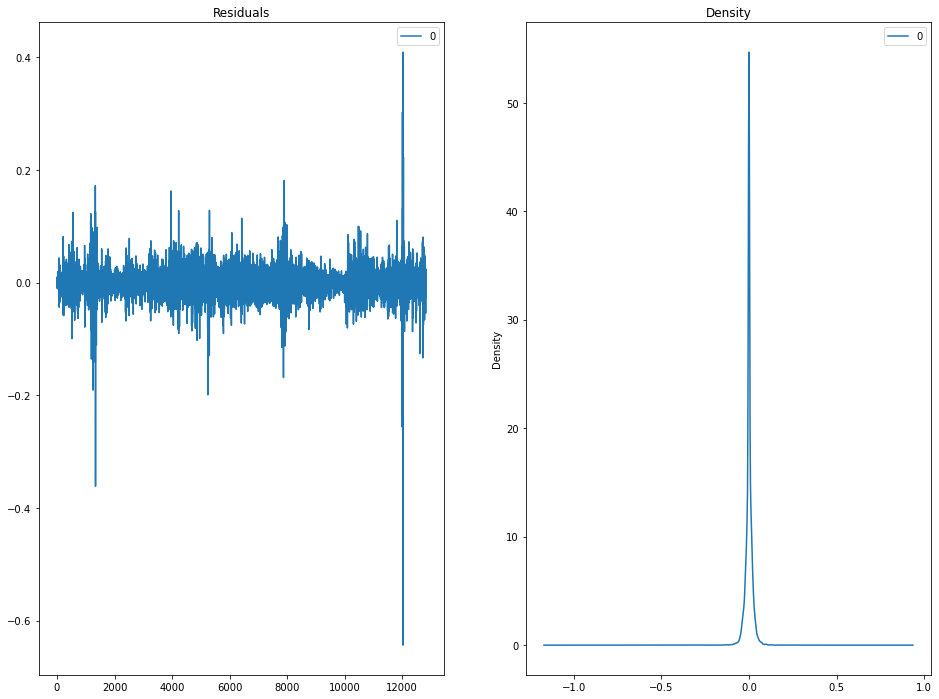

In [75]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [79]:
pip install statsmodels==0.11.0

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'



  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\Users\admin\AppData\Local\Temp\pip-standalone-pip-7d3pqh3x\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\admin\AppData\Local\Temp\pip-build-env-s5h1u0v1\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'cython>=0.29.14' 'numpy==1.14.5; python_version=='"'"'3.5'"'"'' 'numpy==1.14.5; python_version=='"'"'3.6'"'"'' 'numpy==1.14.5; python_version>='"'"'3.7'"'"'' 'numpy==1.17.5; python_version>='"'"'3.8'"'"'' 'scipy>=1.0'
       cwd: None
  Complete output (49 lines):
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
    Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
    Using cached Cython-0.29.30-py2.py3-none-any.whl (985 kB)
  ERROR: Cannot install numpy==1.14.5 and 

In [ ]:
Splitting data as Train and Test set


In [82]:
train = data2[(data2['Date' ] > '1987-05-20') & (data2['Date' ] <= '2018-12-31')]
test = data2[data2['Date' ] >= '2019-01-01']

In [83]:
train

,Date,Price,Year,Month,Week,Price_diff,Price_diff1,Price_log,Price_log_diff,Price_log_diff1
1,1987-05-21,18.45,1987,5,21,0.053867,2.161621,2.915064,-0.009709,0.047868
2,1987-05-22,18.55,1987,5,21,0.053867,2.161621,2.920470,0.005405,0.047868
3,1987-05-23,18.55,1987,5,21,0.053867,2.161621,2.920470,0.000000,0.047868
4,1987-05-24,18.55,1987,5,21,0.053867,2.161621,2.920470,0.000000,0.047868
5,1987-05-25,18.60,1987,5,22,0.053867,2.161621,2.923162,0.002692,0.047868
...,...,...,...,...,...,...,...,...,...,...
11544,2018-12-27,51.49,2018,12,52,-1.350000,-14.540000,3.941388,-0.008509,-0.248722
11545,2018-12-28,50.57,2018,12,52,-1.360000,-16.230000,3.923359,-0.018029,-0.278345
11546,2018-12-29,50.57,2018,12,52,-1.360000,-16.160000,3.923359,0.000000,-0.277296
11547,2018-12-30,50.57,2018,12,52,-1.360000,-16.160000,3.923359,0.000000,-0.277296


In [95]:
train1 = train.drop(["Date","Price", "Year", "Month", "Week", "Price_diff", "Price_diff1", "Price_log", "Price_log_diff1"], axis=1)

In [96]:
train1

,Price_log_diff
1,-0.009709
2,0.005405
3,0.000000
4,0.000000
5,0.002692
...,...
11544,-0.008509
11545,-0.018029
11546,0.000000
11547,0.000000


In [99]:
test1 = test.drop(["Date","Price", "Year", "Month", "Week", "Price_diff", "Price_diff1", "Price_log", "Price_log_diff1"], axis=1)

In [100]:
test1

,Price_log_diff
11549,0.000000
11550,0.066736
11551,-0.015472
11552,0.044280
11553,0.000000
...,...
12818,-0.009042
12819,0.024671
12820,0.000000
12821,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


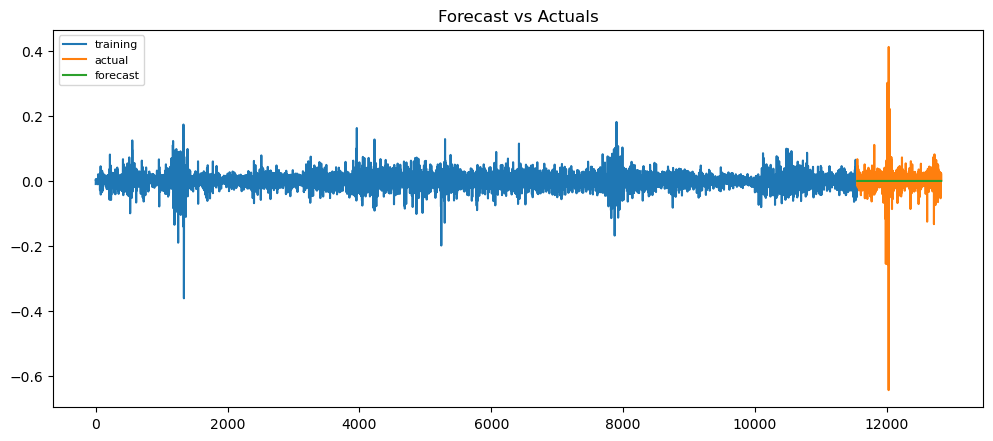

In [107]:

from statsmodels.tsa.stattools import acf

# Build Model
 
model = ARIMA(train1, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, *conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[0], index=test1.index)
upper_series = pd.Series(conf[-1], index=test1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [110]:
train2 = train.drop(["Date","Price", "Year", "Month", "Week", "Price_diff", "Price_diff1", "Price_log_diff","Price_log_diff1"], axis=1)

In [111]:
train2

,Price_log
1,2.915064
2,2.920470
3,2.920470
4,2.920470
5,2.923162
...,...
11544,3.941388
11545,3.923359
11546,3.923359
11547,3.923359


In [112]:
test2 = test.drop(["Date","Price", "Year", "Month", "Week", "Price_diff", "Price_diff1", "Price_log_diff","Price_log_diff1"], axis=1)

In [113]:
test2

,Price_log
11549,3.923359
11550,3.990095
11551,3.974622
11552,4.018902
11553,4.018902
...,...
12818,4.740575
12819,4.765246
12820,4.765246
12821,4.765246


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\

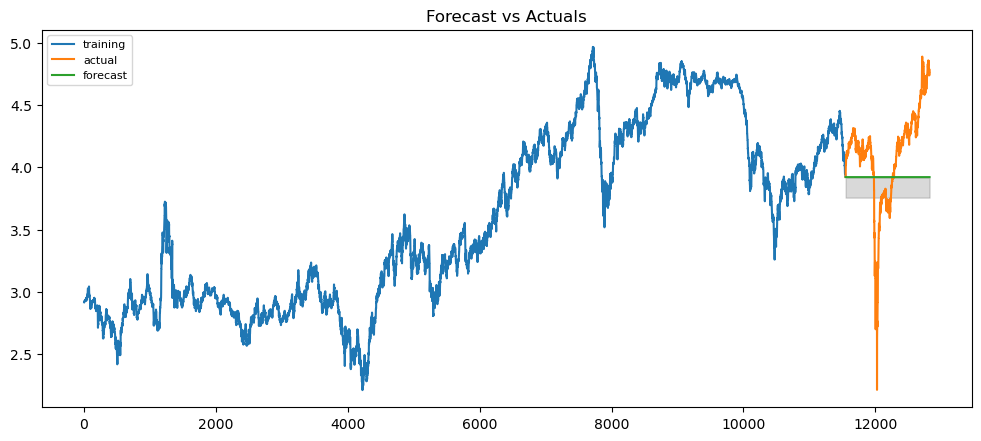

In [122]:
from statsmodels.tsa.stattools import acf

# Build Model
 
model1 = ARIMA(train2, order=(20, 2, 30))  
fitted = model1.fit()  

# Forecast
fc, se, *conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test2.index)
lower_series = pd.Series(conf[0], index=test2.index)
upper_series = pd.Series(conf[-1], index=test2.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2, label='training')
plt.plot(test2, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()